## Introduction to Neural Networks
### 19.1.1 What Is a Neural Network?
- Neural networks (also known as artificial neural networks, or ANN) are a set of algorithms that are modeled after the human brain. 
- They are an advanced form of machine learning that recognizes patterns and features in input data and provides a clear quantitative output. 
- In its simplest form, a neural network contains layers of neurons, which perform individual computations. 
- These computations are connected and weighed against one another until the neurons reach the final layer

### 19.1.2 Perceptron, the Computational Neuron
The perceptron model is a single neural network unit
- Input values, typically labelled as x or 𝝌 (chi, pronounced kaai, as in eye)
- A weight coefficient for each input value, typically labelled as w or ⍵ (omega)
- Bias is a constant value added to the input to influence the final decision, typically labelled as w0. In other words, no matter how many inputs we have, there will always be an additional value to "stir the pot."
- A net summary function that aggregates all weighted inputs

neural networks work by linking together neurons and producing a clear quantitative output.
process of perceptron model training continues again and again until one of three conditions are met:

- The perceptron model exceeds a predetermined performance threshold, determined by the designer before training. In machine learning this is quantified by minimizing the loss metric.
- The perceptron model training performs a set number of iterations, determined by the designer before training.
- The perceptron model is stopped or encounters an error during training.

The activation function is a mathematical function applied to the end of each "neuron" (or each individual perceptron model) that transforms the output to a quantitative value. This quantitative output is used as an input value for other layers in the neural network model. 
- The linear function 
    - returns the sum of our weighted inputs without transformation.

- sigmoid function 
    - identified by a characteristic S curve. It transforms the output to a range between 0 and 1.

- tanh function 
    - identified by a characteristic S curve; however, it transforms the output to a range between -1 and 1.

- Rectified Linear Unit (ReLU) function 
    - returns a value from 0 to infinity, so any negative input through the activation function is 0. It is the most used activation function in neural networks due to its simplifying output, but it might not be appropriate for simpler models.
- The Leaky ReLU function is a "leaky" alternative to the ReLU function, whereby negative input values will return very small negative values.

### 19.1.3 Make the Connections and Explore TensorFlow Playgroun
A basic neural network has three layers:

- An input layer of input values transformed by weight coefficients
- A single "hidden" layer of neurons (single neuron or multiple neurons)
- An output layer that reports the classification or regression model value

https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=spiral&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=1&seed=0.97413&showTestData=false&discretize=true&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&discretize_hide=true&regularization_hide=true&learningRate_hide=true&regularizationRate_hide=true&percTrainData_hide=true&showTestData_hide=true&noise_hide=true&batchSize_hide=true

## 19.2 Build Your First Neural Network
### 19.2.1 Set Up the TensorFlow Pipeline
use the Keras module to help build our basic neural networks.
For our basic neural network, we'll use two Keras classes:
1. Sequential class 
a linear stack of neural network layers, where data flows from one layer to the next. This model is what we simulated in the TensorFlow Playground.
add multiple Dense layers that can act as our input, hidden, and output layers

2. generalized Dense class 
allows us to add layers within the neural network.
define the number of neurons, as well as the activation function

In [1]:
# Installs latest version of TensorFlow 2.X 
##pip install --upgrade tensorflow

### 19.2.2 Build a Basic Neural Network

In [2]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

In [3]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])

df["Target"] = y
df


,Feature 1,Feature 2,Target
0,5.478098,7.203714,1
1,-8.428483,4.121889,0
2,-7.905447,3.323639,0
3,6.411041,5.523013,1
4,7.288599,6.171226,1
...,...,...,...
995,6.208962,5.233968,1
996,-9.795754,3.502709,0
997,4.335167,5.928298,1
998,-8.466632,3.577022,0


<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

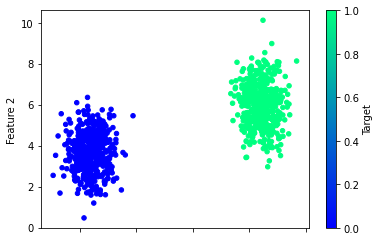

In [4]:
# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")


In [5]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


In [6]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [7]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [8]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))


In [9]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [10]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


The process of informing the model how it should learn and train is called compiling the model.
Keras documentation: https://www.tensorflow.org/guide/keras

1. optimization function 

- shapes and molds a neural network model while it is being trained to ensure that it performs to the best of its ability. 
- use the adam optimizer, which uses a gradient descent approach to ensure that the algorithm will not get stuck on weaker classifying variables and features

optimization functions: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
 

2. loss metric 

- is used by machine learning algorithms to score the performance of the model through each iteration and epoch by evaluating the inaccuracy of a single input.

- For loss function, we'll use binary_crossentropy, which is specifically designed to evaluate a binary classification model.

loss metrics: https://www.tensorflow.org/api_docs/python/tf/keras/losses



3. evaluation metric
- measures the quality of the machine learning model. 
    - model predictive accuracy: classification models
    - model mean squared error (MSE): regression models

In [11]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


### 19.2.3 Train and Test a Basic Neural Network

In [12]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 0.6801 - accuracy: 0.5040
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6753 - accuracy: 0.5987
Epoch 3/100
24/24 [==============================] - 0s 4ms/step - loss: 0.6700 - accuracy: 0.6360
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6640 - accuracy: 0.6560
Epoch 5/100
24/24 [==============================] - 0s 4ms/step - loss: 0.6570 - accuracy: 0.6813
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6488 - accuracy: 0.7187
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6395 - accuracy: 0.7520
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6291 - accuracy: 0.7800
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6171 - accuracy: 0.8013
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6032 - accuracy: 0.8373
Epoch 11/

24/24 [==============================] - 0s 2ms/step - loss: 0.0962 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0946 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0931 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0916 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0901 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0887 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0873 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0859 - accuracy: 1.0000
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0846 - accuracy: 1.0000
Epoch 92/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0833 - accuracy: 1.0000
Epoch 93/100


In [14]:
# visualize the training progres
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))
history_df

,loss,accuracy
1,0.680070,0.504000
2,0.675300,0.598667
3,0.670033,0.636000
4,0.663994,0.656000
5,0.657024,0.681333
...,...,...
96,0.078284,1.000000
97,0.077089,1.000000
98,0.075943,1.000000
99,0.074797,1.000000


<AxesSubplot:>

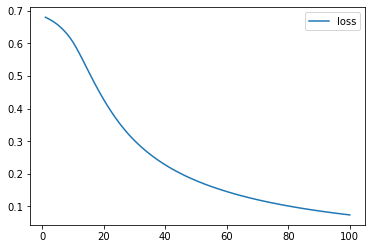

In [15]:
# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

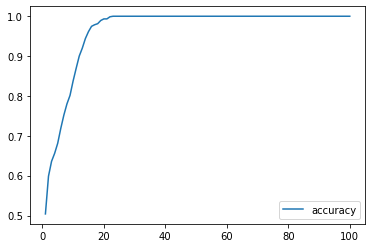

In [16]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [17]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0691 - accuracy: 1.0000 - 399ms/epoch - 50ms/step
Loss: 0.06913359463214874, Accuracy: 1.0


In [ ]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

### 19.2.4 Nuances of Neural Networks on Nonlinear Numbers

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

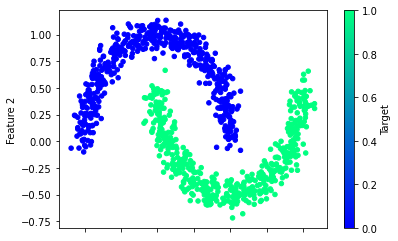

In [24]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")


In [25]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [26]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)


Epoch 1/100


2022-06-15 16:55:11.071027: W tensorflow/core/common_runtime/forward_type_inference.cc:231] Type inference failed. This indicates an invalid graph that escaped type checking. Error message: INVALID_ARGUMENT: expected compatible input types, but input 1:
type_id: TFT_OPTIONAL
args {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_TENSOR
    args {
      type_id: TFT_BOOL
    }
  }
}
 is neither a subtype nor a supertype of the combined inputs preceding it:
type_id: TFT_OPTIONAL
args {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_TENSOR
    args {
      type_id: TFT_LEGACY_VARIANT
    }
  }
}

	while inferring type of node 'binary_crossentropy/cond/output/_10'


24/24 [==============================] - 1s 2ms/step - loss: 0.7304 - accuracy: 0.6640
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6538 - accuracy: 0.6840
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5953 - accuracy: 0.6973
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5568 - accuracy: 0.7093
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5274 - accuracy: 0.7187
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5041 - accuracy: 0.7253
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4854 - accuracy: 0.7333
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4699 - accuracy: 0.7400
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4562 - accuracy: 0.7480
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4444 - accuracy: 0.7640
Epoch 11/100
24/24 [=

24/24 [==============================] - 0s 2ms/step - loss: 0.2613 - accuracy: 0.8907
Epoch 84/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2611 - accuracy: 0.8907
Epoch 85/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2608 - accuracy: 0.8907
Epoch 86/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2605 - accuracy: 0.8907
Epoch 87/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2602 - accuracy: 0.8920
Epoch 88/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2600 - accuracy: 0.8907
Epoch 89/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2598 - accuracy: 0.8920
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2596 - accuracy: 0.8920
Epoch 91/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2594 - accuracy: 0.8920
Epoch 92/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2591 - accuracy: 0.8920
Epoch 93/100


<AxesSubplot:>

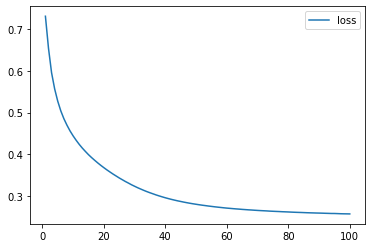

In [27]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

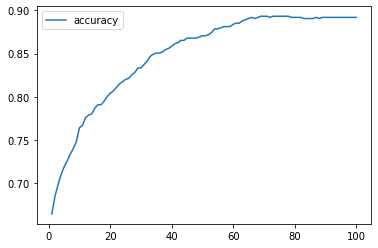

In [28]:
# Plot the accuracy
history_df.plot(y="accuracy")


### 19.2.5 Create the Connective Tissue, the Multiple Neuron Neural Network
multiple-neuron neural networks

A good rule of thumb for a basic neural network is to have two to three times the amount of neurons in the hidden layer as the number of inputs.

In [29]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [30]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


In [31]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)


Epoch 1/100
24/24 [==============================] - 1s 3ms/step - loss: 0.4321 - accuracy: 0.8400
Epoch 2/100
24/24 [==============================] - 0s 4ms/step - loss: 0.4103 - accuracy: 0.8467
Epoch 3/100
24/24 [==============================] - 0s 4ms/step - loss: 0.3903 - accuracy: 0.8507
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.3720 - accuracy: 0.8533
Epoch 5/100
24/24 [==============================] - 0s 5ms/step - loss: 0.3556 - accuracy: 0.8613
Epoch 6/100
24/24 [==============================] - 0s 4ms/step - loss: 0.3411 - accuracy: 0.8667
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.3279 - accuracy: 0.8720
Epoch 8/100
24/24 [==============================] - 0s 4ms/step - loss: 0.3167 - accuracy: 0.8680
Epoch 9/100
24/24 [==============================] - 0s 5ms/step - loss: 0.3072 - accuracy: 0.8680
Epoch 10/100
24/24 [==============================] - 0s 4ms/step - loss: 0.2990 - accuracy: 0.8733
Epoch 11/

24/24 [==============================] - 0s 2ms/step - loss: 0.2236 - accuracy: 0.9053
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2230 - accuracy: 0.9080
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2225 - accuracy: 0.9067
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2220 - accuracy: 0.9067
Epoch 87/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2214 - accuracy: 0.9067
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2207 - accuracy: 0.9067
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2202 - accuracy: 0.9080
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2196 - accuracy: 0.9080
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2189 - accuracy: 0.9107
Epoch 92/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2182 - accuracy: 0.9093
Epoch 93/100


### 19.2.6 Give Your Model a Synaptic Boost

When a neural network model does not meet performance expectations, it is usually due to one of two causes:
- inadequate or inappropriate model design for a given dataset
- insufficient or ineffective training data.

means of optimizing a neural network:
- Check out your input dataset.
- Add more neurons to a hidden layer.
- Add additional hidden layers (deep learning neural network)
- Use a different activation function for the hidden layers.
- Add additional epochs to the training regimen.


The sigmoid function values are normalized to a probability between 0 and 1. which is ideal for binary classification.
2. The tanh function can be used for classification or regression, and it expands the range between -1 and 1.
3. The ReLU function is ideal for looking at positive nonlinear input data for classification or regression.
4. The Leaky ReLU function is a good alternative for nonlinear input data with many negative inputs.


## 19.3 Prepare Your Neural Network Datasets
### 19.3.1 Measure Twice, Model Once
When data has many categorical values, or large gaps between numerical values, a neural network might think that these variables are less important (or more important) than they really are.

### 19.3.2 The Headache of Categorical Variables
neural networks cannot handle categorical variables in their raw form

One-hot encoding identifies all unique column values and splits the single categorical column into a series of columns, each containing information about a single unique categorical value。

The process of reducing the number of unique categorical values in a dataset is known as bucketing or binning.
1. Collapse all of the infrequent and rare categorical values into a single "other" category.
2. Create generalized categorical values and reassign all data points to the new corresponding values.

### 19.3.3 Practice Encoding Categorical Variables


In [33]:
# Import our dependencies
import pandas as pd
import sklearn as skl

# Read in our ramen data
ramen_df = pd.read_csv("Resources/ramen-ratings.csv")

# Print out the Country value counts
country_counts = ramen_df.Country.value_counts()
country_counts

Japan            352
USA              323
South Korea      309
Taiwan           224
Thailand         191
China            169
Malaysia         156
Hong Kong        137
Indonesia        126
Singapore        109
Vietnam          108
UK                69
Philippines       47
Canada            41
India             31
Germany           27
Mexico            25
Australia         22
Netherlands       15
Myanmar           14
Nepal             14
Pakistan           9
Hungary            9
Bangladesh         7
Colombia           6
Brazil             5
Cambodia           5
Fiji               4
Holland            4
Poland             4
Finland            3
Sarawak            3
Sweden             3
Dubai              3
Ghana              2
Estonia            2
Nigeria            1
United States      1
Name: Country, dtype: int64

<AxesSubplot:ylabel='Density'>

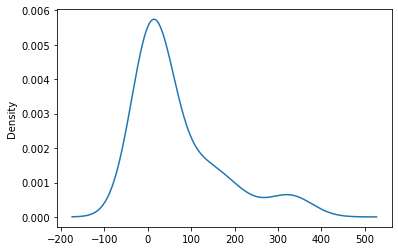

In [34]:
# Visualize the value counts
country_counts.plot.density()

In [36]:
# bucket any country 
#that appears fewer than 100 times in the dataset as "other." 

# Determine which values to replace
replace_countries = list(country_counts[country_counts < 100].index)
replace_countries

# Replace in DataFrame
for country in replace_countries:
    ramen_df.Country = ramen_df.Country.replace(country,"Other")

# Check to make sure binning was successful
ramen_df.Country.value_counts()

Other          376
Japan          352
USA            323
South Korea    309
Taiwan         224
Thailand       191
China          169
Malaysia       156
Hong Kong      137
Indonesia      126
Singapore      109
Vietnam        108
Name: Country, dtype: int64

# ？？？encode_df.columns = enc.get_feature_names(['Country'])

In [41]:
# Create the OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(ramen_df.Country.values.reshape(-1,1)))
print(encode_df.head())

# Rename encoded columns
encode_df.columns = enc.get_feature_names(['Country'])
encode_df.head()


    0    1    2    3    4    5    6    7    8    9    10   11
0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
4  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0


/Users/hankaizhu/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Country_China,Country_Hong Kong,Country_Indonesia,Country_Japan,Country_Malaysia,Country_Other,Country_Singapore,Country_South Korea,Country_Taiwan,Country_Thailand,Country_USA,Country_Vietnam
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
print(ramen_df.head())
print(encode_df.head(10))

   Review #           Brand  \
0      2580       New Touch   
1      2579        Just Way   
2      2578          Nissin   
3      2577         Wei Lih   
4      2576  Ching's Secret   

                                             Variety Style Country Stars  \
0                          T's Restaurant Tantanmen    Cup   Japan  3.75   
1  Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...  Pack  Taiwan     1   
2                      Cup Noodles Chicken Vegetable   Cup     USA  2.25   
3                      GGE Ramen Snack Tomato Flavor  Pack  Taiwan  2.75   
4                                    Singapore Curry  Pack   Other  3.75   

  Top Ten  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN  
   Country_China  Country_Hong Kong  Country_Indonesia  Country_Japan  \
0            0.0                0.0                0.0            1.0   
1            0.0                0.0                0.0            0.0   
2            0.0                0.0                0.0           

In [44]:
# Merge the two DataFrames together and drop the Country column
ramen_df.merge(encode_df,left_index=True,right_index=True).drop("Country",1)


/Users/hankaizhu/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,Review #,Brand,Variety,Style,Stars,Top Ten,Country_China,Country_Hong Kong,Country_Indonesia,Country_Japan,Country_Malaysia,Country_Other,Country_Singapore,Country_South Korea,Country_Taiwan,Country_Thailand,Country_USA,Country_Vietnam
0,2580,New Touch,T's Restaurant Tantanmen,Cup,3.75,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,2.25,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,2.75,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2576,Ching's Secret,Singapore Curry,Pack,3.75,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,3.5,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2577,3,Wai Wai,Tom Yum Shrimp,Pack,2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### 19.3.4 Span the Gap Using Standardization
easons why a raw numeric variable is insufficient for use when training a neural network model, such as:

Raw data often has outliers or extreme values that can artificially inflate a variable's importance.
Numerical data can be measured using different units across a dataset—such as time versus temperature, or length versus volume.
The distribution of a variable can be skewed, leading to misinterpretation of the central tendency.


In [45]:
# Import our dependencies
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Read in our dataset
hr_df = pd.read_csv("Resources/hr_dataset.csv")
hr_df.head()


,Satisfaction_Level,Num_Projects,Time_Spent,Num_Promotions
0,0.30,1,253,2
1,0.25,1,200,0
2,0.90,4,2880,5
3,0.65,3,1450,3
4,0.50,2,785,2


In [46]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [47]:
# Fit the StandardScaler
scaler.fit(hr_df)

StandardScaler()

In [50]:
# Scale the data
scaled_data = scaler.transform(hr_df)
scaled_data[0:5]

array([[-1.3036154 , -1.16247639, -1.04948051, -0.55865556],
       [-1.51294456, -1.16247639, -1.09460336, -1.80488718],
       [ 1.20833454,  0.86023253,  1.18708024,  1.31069188],
       [ 0.16168873,  0.18599622, -0.03038526,  0.06446026],
       [-0.46629875, -0.48824008, -0.59654929, -0.55865556]])

In [51]:
# Create a DataFrame with the scaled data
transformed_scaled_data = pd.DataFrame(scaled_data, columns=hr_df.columns)
transformed_scaled_data.head()


,Satisfaction_Level,Num_Projects,Time_Spent,Num_Promotions
0,-1.303615,-1.162476,-1.049481,-0.558656
1,-1.512945,-1.162476,-1.094603,-1.804887
2,1.208335,0.860233,1.187080,1.310692
3,0.161689,0.185996,-0.030385,0.064460
4,-0.466299,-0.488240,-0.596549,-0.558656


## 19.4 Dig Deeper Into Neural Networks

### 19.4.1 Unleash the Hidden Potential of Neural Networks
limitations to using a basic neural network, such as:
- A basic neural network with many neurons will require more training data than other comparable statistics and machine learning models to produce an adequate model.
- Basic neural networks struggle to interpret complex nonlinear numerical data, or data with many confounding factors that have hidden effects on more than one variable.
- Basic neural networks are incapable of analyzing image datasets without severe data preprocessing.

A neural network with more than one hidden layer is known as a deep neural network.Deep neural network models also are commonly referred to as deep learning models due to their ability to learn from example data, regardless of the complexity or data input type.

trial and error

# ************* DeepLearning_Tabular *****************

### 19.4.2 Real Data, Real Practice Imports and Setup

In [68]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

# Import our input dataset
attrition_df = pd.read_csv('Resources/HR-Employee-Attrition.csv')
print(attrition_df.shape)
attrition_df.head()

(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [71]:
attrition_df.dtypes[0:5]

Age                int64
Attrition         object
BusinessTravel    object
DailyRate          int64
Department        object
dtype: object

In [72]:
# Generate our categorical variable list
attrition_cat = attrition_df.dtypes[attrition_df.dtypes == "object"].index.tolist()
attrition_cat

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

### 19.4.3 Real Data, Real Practice Preprocessing

In [55]:
# Check the number of unique values in each column
attrition_df[attrition_cat].nunique()


Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
OverTime          2
dtype: int64

In [74]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(attrition_df[attrition_cat]))
# print(encode_df.head())

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(attrition_cat)
encode_df.head()

/Users/hankaizhu/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Attrition_No,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [76]:
# to replace the columns in the original DataFrame

# Merge one-hot encoded features and drop the originals
attrition_df = attrition_df.merge(encode_df,left_index=True, right_index=True)
attrition_df = attrition_df.drop(attrition_cat,1)
attrition_df.head()

/Users/hankaizhu/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,49,279,8,1,1,2,3,61,2,2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,37,1373,2,2,1,4,4,92,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,33,1392,3,4,1,5,4,56,3,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,27,591,2,1,1,7,1,40,3,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [77]:
# Next we must split our training and testing data, 
#then standardize our numerical variables using Scikit-learn's StandardScaler module.

# Split our preprocessed data into our features and target arrays
y = attrition_df["Attrition_Yes"].values
X = attrition_df.drop(["Attrition_Yes","Attrition_No"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

/Users/hankaizhu/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [79]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_test_scaled[0:2]

array([[ 0.14649666,  1.72662484,  0.12095847,  0.10528682,  0.        ,
        -0.66847923,  0.27821319,  0.47433644,  0.38047011, -0.02218292,
         0.26186474,  0.75546472,  1.10997906,  0.12327498,  1.08133345,
        -0.41664004,  0.26409702,  0.        ,  0.24404533,  0.93202782,
         0.9278685 ,  0.34094003, -0.97270583, -1.14162405, -0.67430453,
        -1.14417648, -0.33801897, -0.47231924,  0.63125047, -0.20393112,
         0.70806949, -0.64533127, -0.13245324, -0.81680533, -0.35445508,
         1.49071198, -0.26242176, -0.32622952,  1.2572972 , -1.2572972 ,
         3.37372531, -0.18639148, -0.48520718, -0.27599253, -0.34134248,
        -0.22028439, -0.50934131, -0.51357713, -0.25036136, -0.52906246,
         1.08728019, -0.69080518,  0.        ,  0.61581168, -0.61581168],
       [-0.85416027, -0.89225519, -0.13030682, -1.87806491,  0.        ,
         0.83722325,  0.27821319, -1.35404265, -2.4429512 , -0.02218292,
        -1.54172867,  0.7320611 , -0.97210968,  0.

### 19.4.4 Real Data, Real Practice Deep Learning Model Design

In [80]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 5
print(len(X_train[0]))

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

55
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 8)                 448       
                                                                 
 dense_8 (Dense)             (None, 5)                 45        
                                                                 
 dense_9 (Dense)             (None, 1)                 6         
                                                                 
Total params: 499
Trainable params: 499
Non-trainable params: 0
_________________________________________________________________


In [61]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


the number of weight parameters (weight coefficients) for each layer equals the number of input values times the number of neurons plus a bias term for each neuron.

### 19.4.5 Real Data, Real Practice Train and Evaluate the Model

In [62]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100)


Epoch 1/100
35/35 [==============================] - 1s 2ms/step - loss: 386.8833 - accuracy: 0.5372
Epoch 2/100
35/35 [==============================] - 0s 2ms/step - loss: 60.2227 - accuracy: 0.7623
Epoch 3/100
35/35 [==============================] - 0s 2ms/step - loss: 33.9664 - accuracy: 0.7831
Epoch 4/100
35/35 [==============================] - 0s 2ms/step - loss: 24.4750 - accuracy: 0.7704
Epoch 5/100
35/35 [==============================] - 0s 2ms/step - loss: 19.1377 - accuracy: 0.7695
Epoch 6/100
35/35 [==============================] - 0s 2ms/step - loss: 14.7503 - accuracy: 0.7532
Epoch 7/100
35/35 [==============================] - 0s 2ms/step - loss: 13.1340 - accuracy: 0.7559
Epoch 8/100
35/35 [==============================] - 0s 2ms/step - loss: 11.9927 - accuracy: 0.7405
Epoch 9/100
35/35 [==============================] - 0s 2ms/step - loss: 10.5561 - accuracy: 0.7459
Epoch 10/100
35/35 [==============================] - 0s 2ms/step - loss: 9.8592 - accuracy: 0.7568

35/35 [==============================] - 0s 2ms/step - loss: 3.3963 - accuracy: 0.7868
Epoch 83/100
35/35 [==============================] - 0s 2ms/step - loss: 4.0362 - accuracy: 0.7650
Epoch 84/100
35/35 [==============================] - 0s 2ms/step - loss: 2.5999 - accuracy: 0.7858
Epoch 85/100
35/35 [==============================] - 0s 1ms/step - loss: 2.6085 - accuracy: 0.7931
Epoch 86/100
35/35 [==============================] - 0s 1ms/step - loss: 2.6854 - accuracy: 0.7677
Epoch 87/100
35/35 [==============================] - 0s 2ms/step - loss: 2.6151 - accuracy: 0.7849
Epoch 88/100
35/35 [==============================] - 0s 2ms/step - loss: 2.6405 - accuracy: 0.7804
Epoch 89/100
35/35 [==============================] - 0s 2ms/step - loss: 5.2438 - accuracy: 0.7505
Epoch 90/100
35/35 [==============================] - 0s 2ms/step - loss: 4.7374 - accuracy: 0.7831
Epoch 91/100
35/35 [==============================] - 0s 2ms/step - loss: 2.7098 - accuracy: 0.7804
Epoch 92/100


In [63]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


12/12 - 0s - loss: 3.1375 - accuracy: 0.8696 - 178ms/epoch - 15ms/step
Loss: 3.137469530105591, Accuracy: 0.8695651888847351


## 19.5 Select the Best Model for Your Dataset

### 19.5.1 Whose Model Is It Anyway?

### 19.5.2 Logistic Regression Vs. a Basic Neural Network
logistic regression: A statistical model that mathematically determines its probability of belonging to one of two groups.

sigmoid curve, which is used to produce the probability (between 0 and 1) of the input data belonging to the first group. 

# ************* LogisticRegression_NeuralNet *****************
a basic neural network using the sigmoid activation function is effectively a logistic regression model
To demonstrate how similar the logistic regression and basic neural network models are in terms of performance, we'll build and evaluate both models using the same training/testing dataset.

In [82]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf

# Import our input dataset
diabetes_df = pd.read_csv('Resources/diabetes.csv')
diabetes_df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [83]:
# Remove diabetes outcome target from features data
y = diabetes_df.Outcome
X = diabetes_df.drop(columns="Outcome")

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)


In [ ]:
# Preprocess numerical data for neural network

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [84]:
## basic logistic regression parameters

# Define the logistic regression model
log_classifier = LogisticRegression(solver="lbfgs",max_iter=200)

# Train the model
log_classifier.fit(X_train,y_train)

# Evaluate the model
y_pred = log_classifier.predict(X_test)
print(f" Logistic regression model accuracy: {accuracy_score(y_test,y_pred):.3f}")


 Logistic regression model accuracy: 0.729


## ?????

In [87]:
## build, compile, and evaluate our basic neural network model.
# typical binary classifier parameters

# Define the basic neural network model
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=16, activation="relu", input_dim=8))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


ValueError: Data cardinality is ambiguous:
  x sizes: 1102
  y sizes: 576
Make sure all arrays contain the same number of samples.

n contrast, neural networks (and especially deep neural networks) thrive in large datasets. Datasets with thousands of data points, or datasets with complex features, may overwhelm the logistic regression model, while a deep learning model can evaluate every interaction within and across neurons. 

### 19.5.3 Support Vector Machine Vs. Deep Learning Model

SVMs are a type of binary classifier that use geometric boundaries to distinguish data points from two separate groups.
SVMs are supervised learning models that analyze data used for regression and classification.
- Unlike logistic regression, which excels in classifying data that is linearly separable but fails in nonlinear relationships, SVMs can build adequate models with linear or nonlinear data. 

- can analyze and interpret multiple data types, such as images, natural language voice and text, or tabular data. 

- SVMs are limited in their potential and can still miss critical features and high-dimensionality relationships that a well-trained deep learning model could find.

# ************* SVM_DeepLearning *****************
build a binary classifier using an SVM and deep learning model and compare the predictive accuracy of either model.

In [89]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import pandas as pd
import tensorflow as tf

# Import our input dataset
tele_df = pd.read_csv('Resources/bank_telemarketing.csv')
tele_df.head()

,Age,Job,Marital_Status,Education,Default_Credit,Housing_Loan,Personal_Loan,Subscribed
0,56,other,married,Primary_Education,no,no,no,no
1,37,services,married,Secondary_Education,no,yes,no,no
2,40,admin,married,Primary_Education,no,no,no,no
3,56,services,married,Secondary_Education,no,no,yes,no
4,59,admin,married,Professional_Education,no,no,no,no


In [90]:
# Generate our categorical variable list
tele_cat = tele_df.dtypes[tele_df.dtypes == "object"].index.tolist()


# Check the number of unique values in each column
tele_df[tele_cat].nunique()


Job               9
Marital_Status    3
Education         4
Default_Credit    2
Housing_Loan      2
Personal_Loan     2
Subscribed        2
dtype: int64

In [91]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(tele_df[tele_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(tele_cat)
encode_df.head()


/Users/hankaizhu/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Job_admin,Job_blue-collar,Job_entrepreneur,Job_management,Job_other,Job_retired,Job_self-employed,Job_services,Job_technician,Marital_Status_divorced,...,Education_Secondary_Education,Education_Tertiary_Education,Default_Credit_no,Default_Credit_yes,Housing_Loan_no,Housing_Loan_yes,Personal_Loan_no,Personal_Loan_yes,Subscribed_no,Subscribed_yes
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [92]:
# Merge one-hot encoded features and drop the originals
tele_df = tele_df.merge(encode_df,left_index=True, right_index=True)
tele_df = tele_df.drop(tele_cat,1)
tele_df.head()

/Users/hankaizhu/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,Age,Job_admin,Job_blue-collar,Job_entrepreneur,Job_management,Job_other,Job_retired,Job_self-employed,Job_services,Job_technician,...,Education_Secondary_Education,Education_Tertiary_Education,Default_Credit_no,Default_Credit_yes,Housing_Loan_no,Housing_Loan_yes,Personal_Loan_no,Personal_Loan_yes,Subscribed_no,Subscribed_yes
0,56,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,40,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,59,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [93]:
# Remove loan status target from features data
y = tele_df.Subscribed_yes.values
X = tele_df.drop(columns=["Subscribed_no","Subscribed_yes"]).values

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [94]:
# Create the SVM model
svm = SVC(kernel='linear')

In [97]:
# Train the model
svm.fit(X_train, y_train)


SVC(kernel='linear')

In [98]:
# Evaluate the model
y_pred = svm.predict(X_test_scaled)
print(f" SVM model accuracy: {accuracy_score(y_test,y_pred):.3f}")


 SVM model accuracy: 0.873


In [100]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 10
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [101]:
# Train the model 
fit_model = nn.fit(X_train_scaled, y_train, epochs=50) 
# Evaluate the model using the test data 
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


Epoch 1/50
715/715 [==============================] - 2s 2ms/step - loss: 0.4616 - accuracy: 0.8223
Epoch 2/50
715/715 [==============================] - 1s 2ms/step - loss: 0.3727 - accuracy: 0.8735
Epoch 3/50
715/715 [==============================] - 1s 2ms/step - loss: 0.3700 - accuracy: 0.8735
Epoch 4/50
715/715 [==============================] - 1s 2ms/step - loss: 0.3687 - accuracy: 0.8735
Epoch 5/50
715/715 [==============================] - 1s 2ms/step - loss: 0.3679 - accuracy: 0.8733
Epoch 6/50
715/715 [==============================] - 1s 2ms/step - loss: 0.3673 - accuracy: 0.8733
Epoch 7/50
715/715 [==============================] - 1s 2ms/step - loss: 0.3663 - accuracy: 0.8736
Epoch 8/50
715/715 [==============================] - 1s 2ms/step - loss: 0.3659 - accuracy: 0.8734
Epoch 9/50
715/715 [==============================] - 1s 2ms/step - loss: 0.3656 - accuracy: 0.8733
Epoch 10/50
715/715 [==============================] - 1s 2ms/step - loss: 0.3652 - accuracy: 0.8734

### 19.5.4 Random Forest Vs. Deep Learning Model

- Random forest classifiers are a type of ensemble learning model that combines multiple smaller models into a more robust and accurate model.

- Random forest is a supervised ensemble learning model that combines decision trees to analyze input data.

- andom forest models will only handle tabular data,Neural networks can handle all sorts of data types and structures in raw format or with general transformations (such as converting categorical data).
- deep learning model might be able to identify variability in a dataset that a random forest model could miss.


# ************* RandomForest_DeepLearning *****************


To compare the implementation and performance of a random forest model versus a deep learning model, we'll train and evaluate both models on the same data.

In [113]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import tensorflow as tf

# Import our input dataset
loans_df = pd.read_csv('Resources/loan_status.csv')
print(loans_df.shape)
loans_df.head()

(36423, 17)


,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,Fully_Paid,99999999,Short_Term,741.0,2231892.0,8_years,Own_Home,Debt_Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
1,Fully_Paid,217646,Short_Term,730.0,1184194.0,<_1_year,Home_Mortgage,Debt_Consolidation,10855.08,19.6,10.0,13,1,122170,272052.0,1.0,0.0
2,Fully_Paid,548746,Short_Term,678.0,2559110.0,2_years,Rent,Debt_Consolidation,18660.28,22.6,33.0,4,0,437171,555038.0,0.0,0.0
3,Fully_Paid,99999999,Short_Term,728.0,714628.0,3_years,Rent,Debt_Consolidation,11851.06,16.0,76.0,16,0,203965,289784.0,0.0,0.0
4,Fully_Paid,99999999,Short_Term,740.0,776188.0,<_1_year,Own_Home,Debt_Consolidation,11578.22,8.5,25.0,6,0,134083,220220.0,0.0,0.0


# ??? loans_cat = loans_df.dtypes[loans_df.dtypes
[0]???
== "object"].index.tolist()


In [114]:
# both Scikit-Learn's RandomForestClassifier class and TensorFlow's Sequential class require preprocessing

# encode categorical variables using Scikit-Learn's OneHotEncoder class
# Generate our categorical variable list
loans_cat = loans_df.dtypes[loans_df.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
loans_df[loans_cat].nunique()


Loan_Status              2
Term                     2
Years_in_current_job    11
Home_Ownership           4
Purpose                  7
dtype: int64

In [115]:
# Check the unique value counts to see if binning is required
loans_df.Years_in_current_job.value_counts()

# all of the categorical values have a substantial number of data points

10+_years    13149
2_years       3225
3_years       2997
<_1_year      2699
5_years       2487
4_years       2286
1_year        2247
6_years       2109
7_years       2082
8_years       1675
9_years       1467
Name: Years_in_current_job, dtype: int64

In [116]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(loans_df[loans_cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(loans_cat)
print(encode_df.shape)
encode_df.head()

(36423, 26)


/Users/hankaizhu/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Loan_Status_Fully_Paid,Loan_Status_Not_Paid,Term_Long_Term,Term_Short_Term,Years_in_current_job_10+_years,Years_in_current_job_1_year,Years_in_current_job_2_years,Years_in_current_job_3_years,Years_in_current_job_4_years,Years_in_current_job_5_years,...,Home_Ownership_Home_Mortgage,Home_Ownership_Own_Home,Home_Ownership_Rent,Purpose_Business_Loan,Purpose_Buy_House,Purpose_Buy_a_Car,Purpose_Debt_Consolidation,Purpose_Home_Improvements,Purpose_Medical_Bills,Purpose_Other
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [117]:
# Merge one-hot encoded features and drop the originals
loans_df = loans_df.merge(encode_df,left_index=True, right_index=True)
loans_df = loans_df.drop(loans_cat,1)
print(loans_df.shape)
loans_df.head()

(36423, 38)


/Users/hankaizhu/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,Current_Loan_Amount,Credit_Score,Annual_Income,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,...,Home_Ownership_Home_Mortgage,Home_Ownership_Own_Home,Home_Ownership_Rent,Purpose_Business_Loan,Purpose_Buy_House,Purpose_Buy_a_Car,Purpose_Debt_Consolidation,Purpose_Home_Improvements,Purpose_Medical_Bills,Purpose_Other
0,99999999,741.0,2231892.0,29200.53,14.9,29.0,18,1,297996,750090.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,217646,730.0,1184194.0,10855.08,19.6,10.0,13,1,122170,272052.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,548746,678.0,2559110.0,18660.28,22.6,33.0,4,0,437171,555038.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,99999999,728.0,714628.0,11851.06,16.0,76.0,16,0,203965,289784.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,99999999,740.0,776188.0,11578.22,8.5,25.0,6,0,134083,220220.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Split our data into the training and testing sets prior to standardization to ???  not incorporate the testing values ???  into the scale


In [118]:
# Remove loan status target from features data
y = loans_df.Loan_Status_Fully_Paid
X = loans_df.drop(columns=["Loan_Status_Fully_Paid","Loan_Status_Not_Paid"])

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


### Random forest models can be built using Scikit-learn's RandomForestClassifierclass in the ensemblemodule.


In [119]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78) #Typically, 128 estimators is the largest number of estimators we would want to use in a model

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")


 Random forest predictive accuracy: 0.849


### build, compile, and evaluate our deep learning model. Again, we'll use our typical binary classifier parameters:

- Our first hidden layer will have an input_dim equal to 38, 24 neuron units, and will use the relu activation function.
- Our second hidden layer will have 12 neuron unitsand also will use the relu activation function.
- The loss function should be binary_crossentropy, using the adam optimizer.


In [120]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 24
hidden_nodes_layer2 = 12

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
854/854 [==============================] - 2s 2ms/step - loss: 0.4225 - accuracy: 0.8365
Epoch 2/50
854/854 [==============================] - 1s 2ms/step - loss: 0.3857 - accuracy: 0.8489
Epoch 3/50
854/854 [==============================] - 1s 2ms/step - loss: 0.3814 - accuracy: 0.8495
Epoch 4/50
854/854 [==============================] - 1s 2ms/step - loss: 0.3794 - accuracy: 0.8495
Epoch 5/50
854/854 [==============================] - 2s 2ms/step - loss: 0.3782 - accuracy: 0.8494
Epoch 6/50
854/854 [==============================] - 2s 2ms/step - loss: 0.3772 - accuracy: 0.8495
Epoch 7/50
854/854 [==============================] - 2s 2ms/step - loss: 0.3765 - accuracy: 0.8494
Epoch 8/50
854/854 [==============================] - 1s 2ms/step - loss: 0.3758 - accuracy: 0.8496
Epoch 9/50
854/854 [==============================] - 1s 2ms/step - loss: 0.3752 - accuracy: 0.8496
Epoch 10/50
854/854 [==============================] - 1s 2ms/step - loss: 0.3740 - accuracy: 0.8494

the random forest classifier was able to train on the large dataset and predict values in seconds, while the deep learning model required a couple minutes to train on the tens of thousands of data points. In other words, the random forest model is able to achieve comparable predictive accuracy on large tabular data with less code and faster performance. 

The ultimate decision of whether to use a random forest versus a neural network comes down to preference. However, if your dataset is tabular, random forest is a great place to start.

## 19.6 Export and Import Trained Models

### 19.6.1 Checkpoints Are Not Just for Video Games

To create an effective checkpoint callback using the ModelCheckpoint method, we need to provide the following parameters:

- filepath=checkpoint_path—the checkpoint directory and file structure we defined previously
- verbose=1—we'll be notified when a checkpoint is being saved to the directory
- save_weights_only=True—saving the full model each time can fill up a hard drive very quickly; this ensures that the checkpoint files take up minimal space
- save_freq='epoch'—checkpoints will be saved every epoch

In [ ]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [ ]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch')

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 5

nn_new = tf.keras.models.Sequential()

# First hidden layer
nn_new.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_new.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn_new.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Restore the model weights
nn_new.load_weights("checkpoints/weights.100.hdf5")

# Evaluate the model using the test data
model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

### 19.6.2 For Best Results, Please Save After Training

In [ ]:
# Export our model to HDF5 file
nn_new.save("trained_attrition.h5")


In [ ]:
# Import the model to a new object
nn_imported = tf.keras.models.load_model('trained_attrition.h5')


In [ ]:
# Evaluate the completed model using the test data
model_loss, model_accuracy = nn_imported.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")
